In [53]:
import pandas as pd
import numpy as np
import pyodbc
import statsmodels.api as sm
from dotenv import dotenv_values

# Suppress all warnings
import warnings

warnings.filterwarnings("ignore")



In [54]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials from .env file
database=environment_variables.get("databasename")
server=environment_variables.get("servername")
login=environment_variables.get("user")
password=environment_variables.get("password")

# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [55]:
#Connecting to the Server
connection = pyodbc.connect(connection_string)

In [56]:
# Loading First dataset 3000 records
first_data = pd.read_sql_query(
    "SELECT * FROM dbo.LP2_Telco_churn_first_3000", connection)

# Saving the DataFrame to a CSV file
first_data.to_csv('data/LP2_Telco_churn_first_3000.csv', index=False)

first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [57]:
#Check shape of first_dataset
first_data.shape

(3000, 21)

In [58]:
second_data= pd.read_csv('data/LP2_Telco-churn-second-2000.csv')

#Data preview
second_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [59]:
#Check shape of second_data
second_data.shape

(2043, 21)

In [60]:
# Loading Test data
test_data = pd.read_excel('data\Telco-churn-last-2000.xlsx')

# Data preview
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [61]:
#Merge dataset
#merged_df= pd.concat([first_data, second_data])
#merged_df.to_csv('merged_df.csv')

In [62]:
# Loading merged_df.csv
merged= pd.read_csv('data\merged_df.csv')

# Data preview
merged.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [63]:
#Check shape of merged_data
merged.shape

(5043, 22)

In [64]:
#Check merge data info
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   int64  
 4   Partner           5043 non-null   object 
 5   Dependents        5043 non-null   object 
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   object 
 8   MultipleLines     4774 non-null   object 
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    4392 non-null   object 
 11  OnlineBackup      4392 non-null   object 
 12  DeviceProtection  4392 non-null   object 
 13  TechSupport       4392 non-null   object 
 14  StreamingTV       4392 non-null   object 
 15  StreamingMovies   4392 non-null   object 
 16  Contract          5043 non-null   object 


In [65]:
#Drop irrelevant column from merged_data
merged = merged.drop('Unnamed: 0', axis = 'columns')

In [66]:
#Confirm dropped column from merged_DataFrame
merged.shape

(5043, 21)

In [67]:
#Check column names in merged_DataFrame
merged.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [68]:
#Checking the data types of the columns
merged.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


- Only about `16.24%` of the customers are senior citizens, suggesting that the company’s customer base is predominantly younger. whereas the `median tenure is 29 months`, indicating that half of the customers stay for `less than 2.5 years`. That not withstanding, the 25th percentile for monthly charges is `$35.78`, while the 75th percentile is `$90.05`. This spread indicates a significant difference in what customers are willing to pay.

In [70]:
# Check for duplicates in merged_data
duplicate_rows = merged.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [71]:
# loop through columns in training data
for column in merged.columns:
 
    #check if the column is not a numerical column
    if (merged[column].dtype not in ['int64', 'float64']):
 
        # print out unique values in categorical columns
        print(f'column: {column}\nunique values: {merged[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: Partner
unique values: ['True' 'False' 'No' 'Yes']
----------------------------------------------------------------------
column: Dependents
unique values: ['False' 'True' 'No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: ['False' 'True' 'Yes' 'No']
----------------------------------------------------------------------
column: MultipleLines
unique values: [nan 'False' 'True' 'No' 'No phone service' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique values: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------------------------

In [72]:
merged.TotalCharges = pd.to_numeric(merged.TotalCharges, errors='coerce')
merged.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [73]:
# Drop missing value from churn
merged.dropna(subset=['Churn'], inplace=True)


In [74]:
# Replace 'True' with 'Yes' and 'False' with 'No'
merged.replace({'True': 'Yes', 'False': 'No'}, inplace=True)

In [75]:
# loop through columns in training data
for column in merged.columns:
 
    #check if the column is not a numerical column
    if (merged[column].dtype not in ['int64', 'float64']):
 
        # print out unique values in categorical columns
        print(f'column: {column}\nunique values: {merged[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: Partner
unique values: ['Yes' 'No']
----------------------------------------------------------------------
column: Dependents
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: MultipleLines
unique values: [nan 'No' 'Yes' 'No phone service']
----------------------------------------------------------------------
column: InternetService
unique values: ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
column: OnlineSecurity
unique values: ['No' 'Yes' nan 'No

### Univariate Analysis 

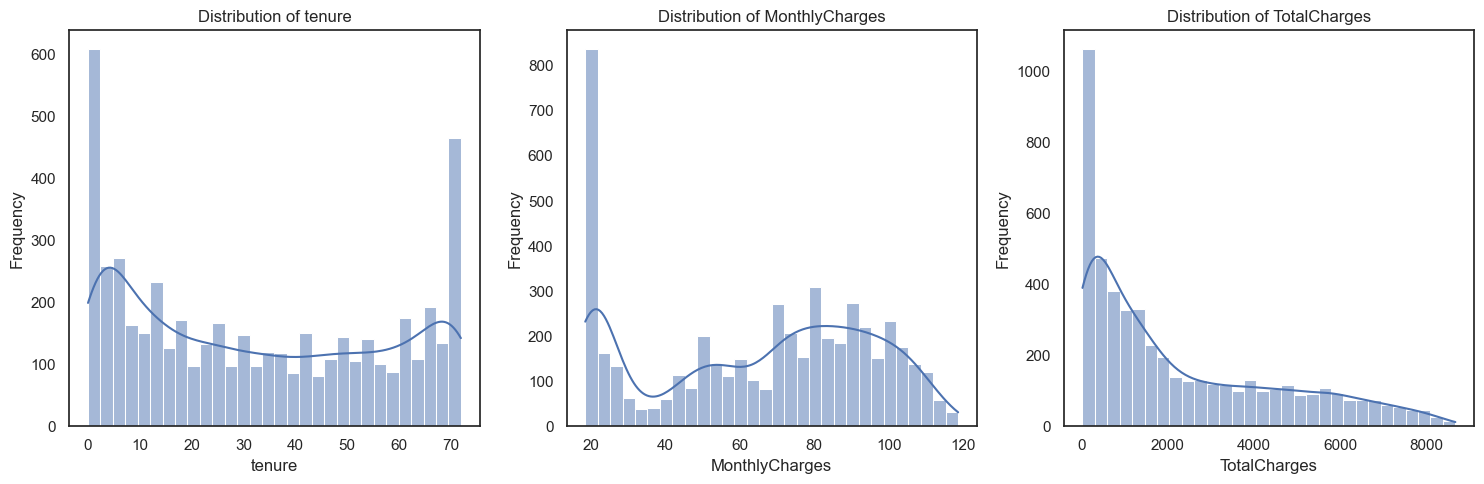

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plot histograms for numerical columns in a grid view
for i, column in enumerate(numerical_columns):
    sns.histplot(data=merged, x=column, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

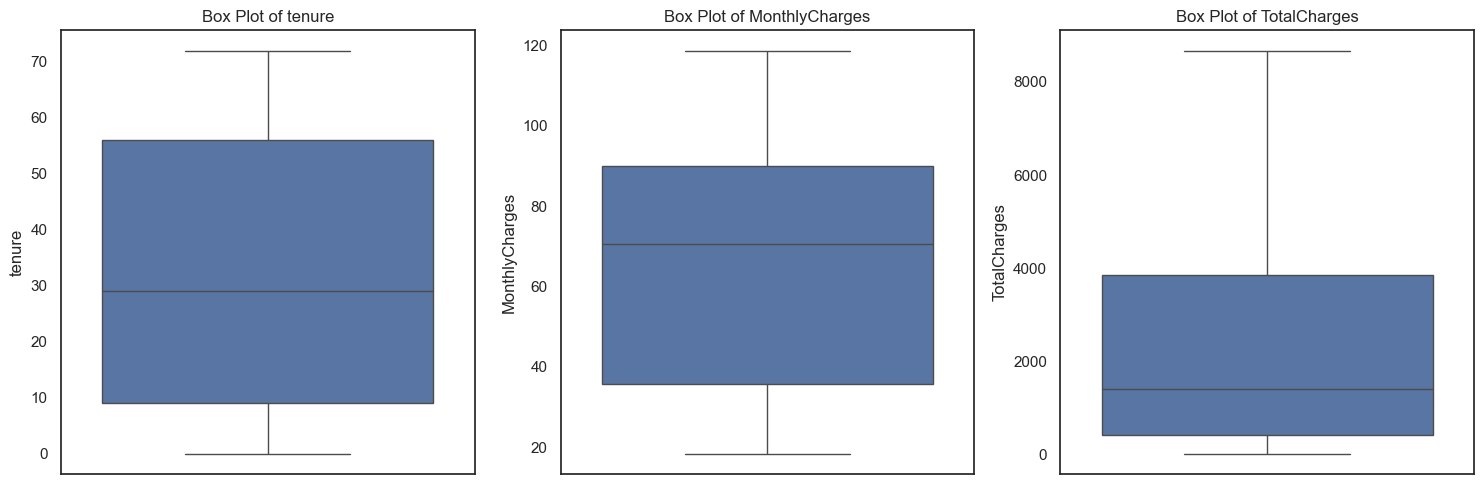

In [107]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create box plots
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=merged[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [77]:
# Categorical Columns(Univariate)
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

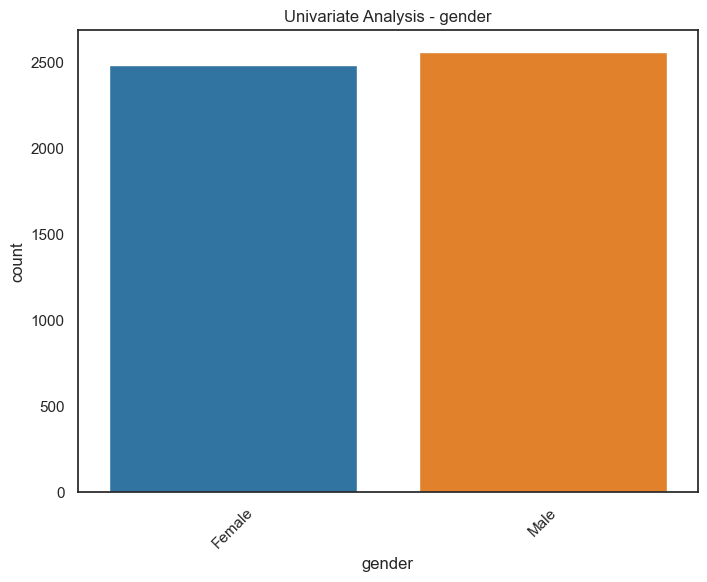

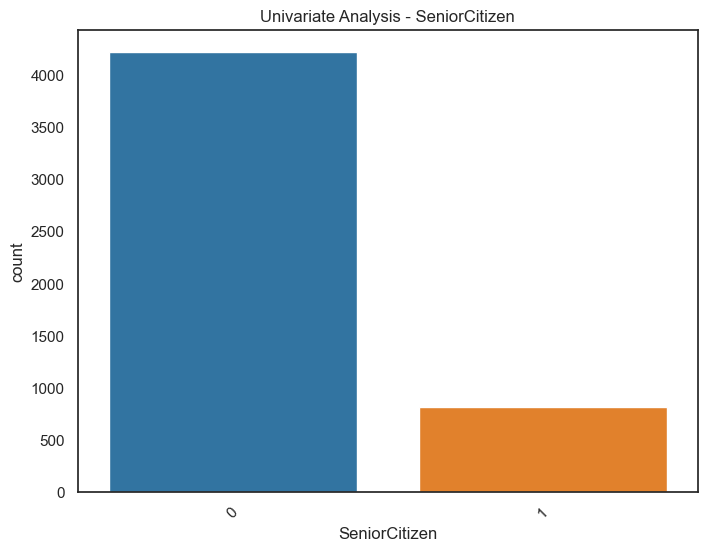

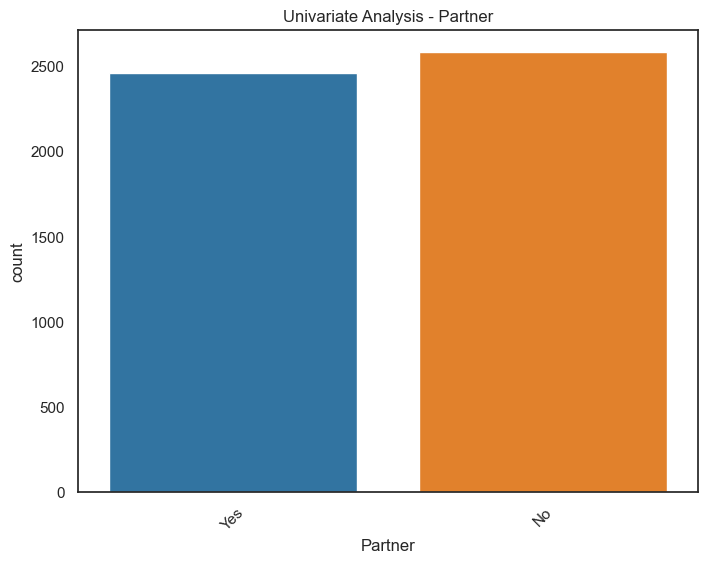

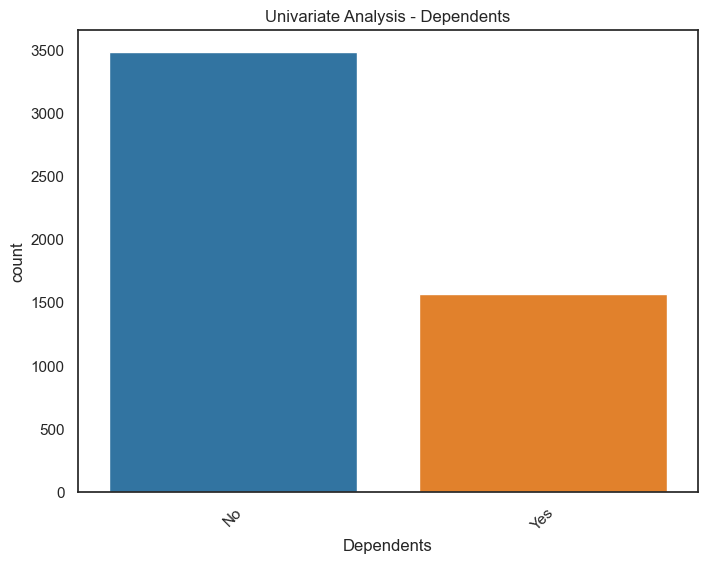

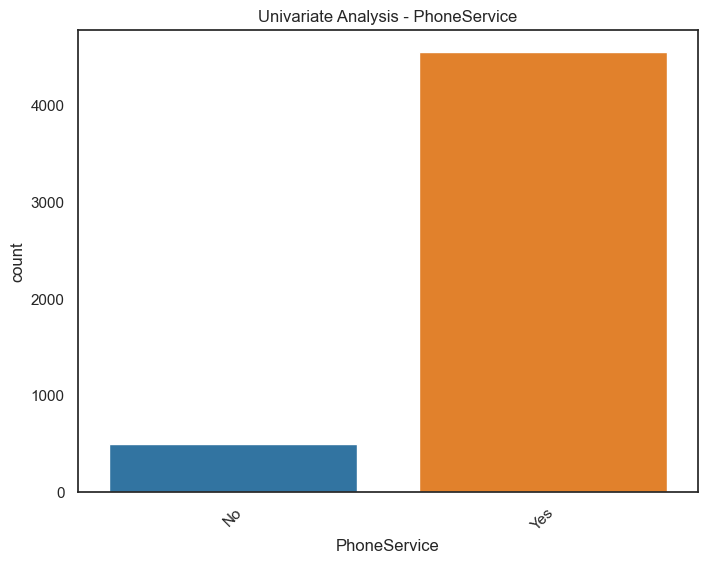

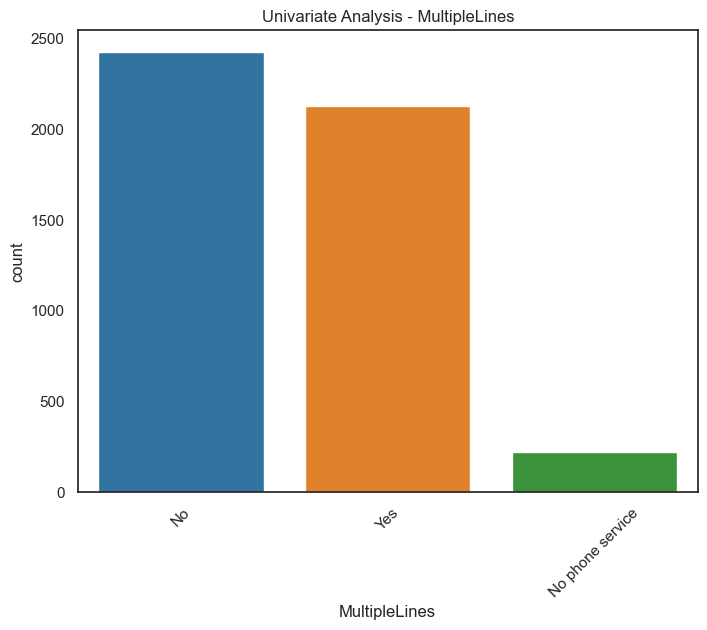

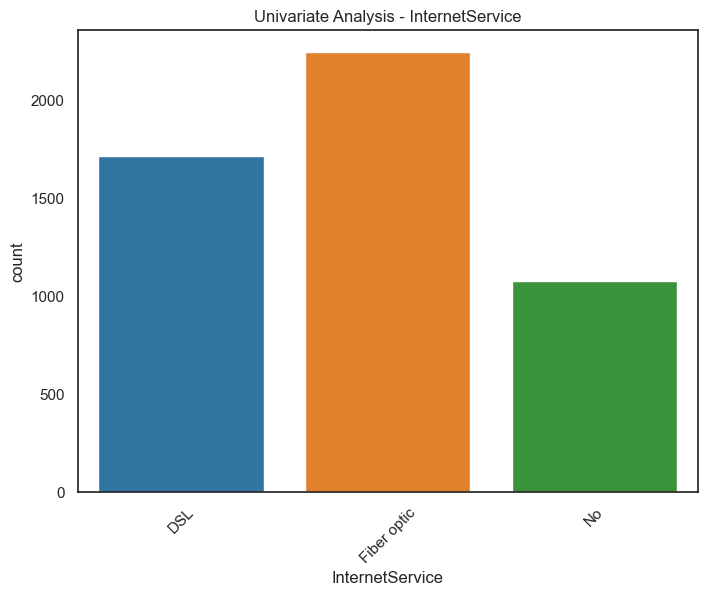

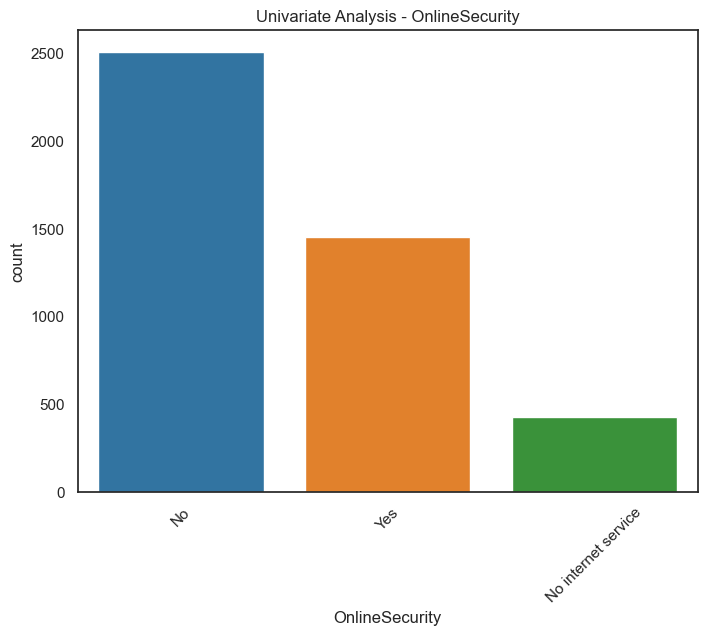

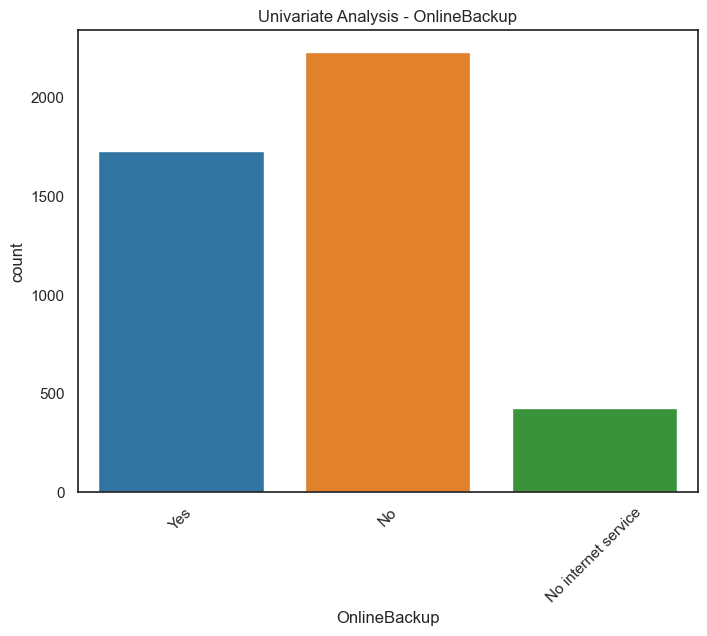

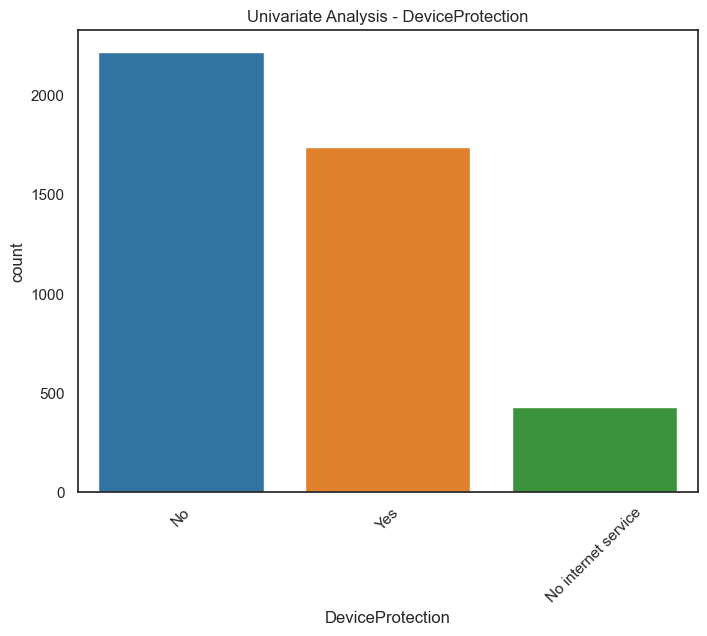

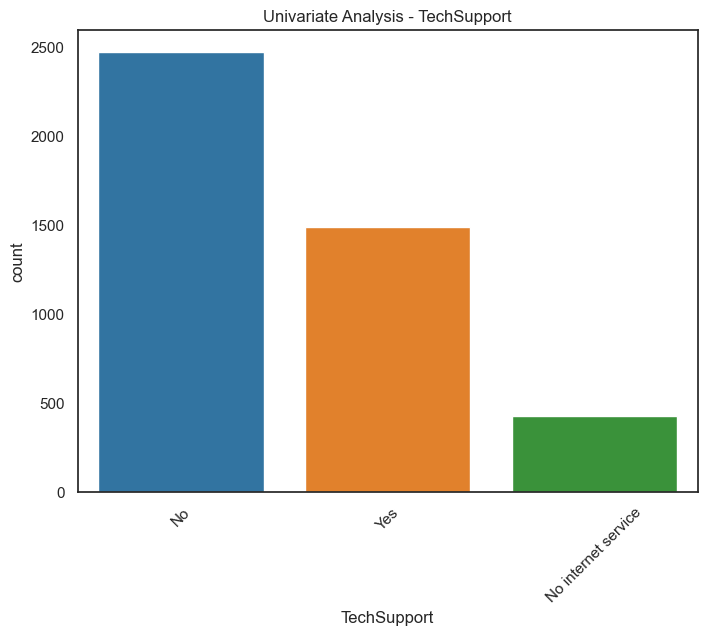

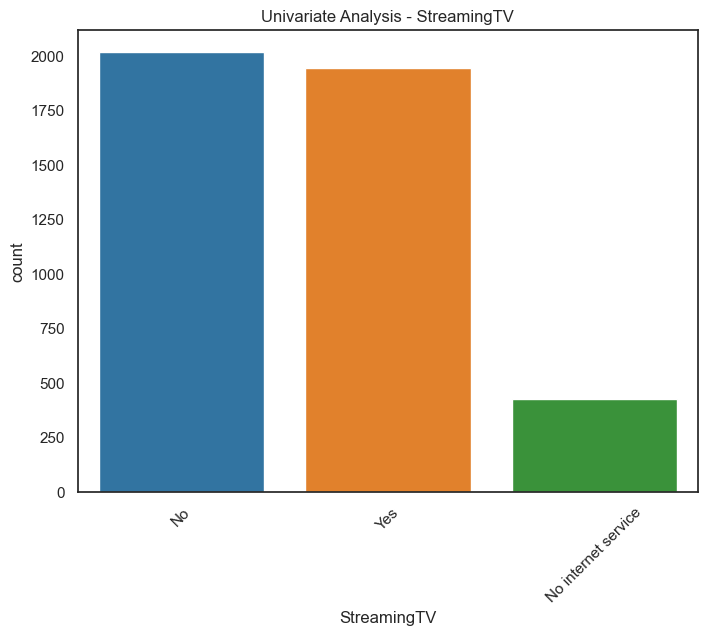

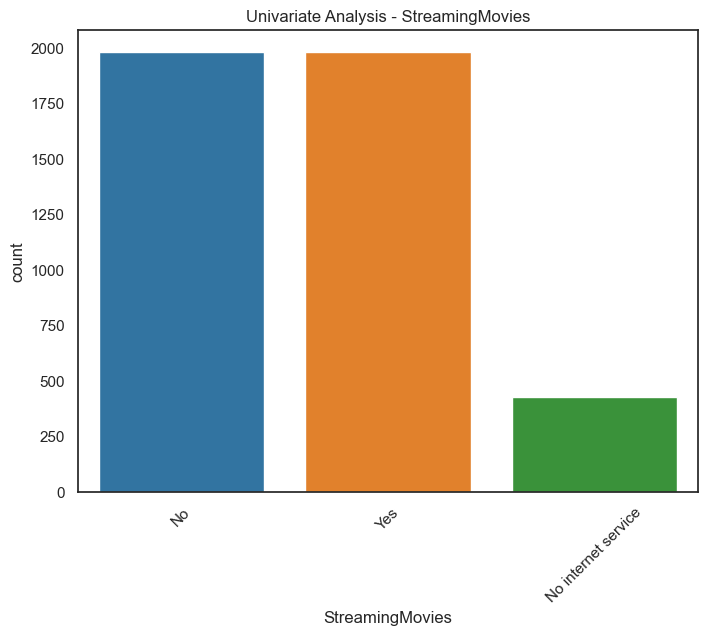

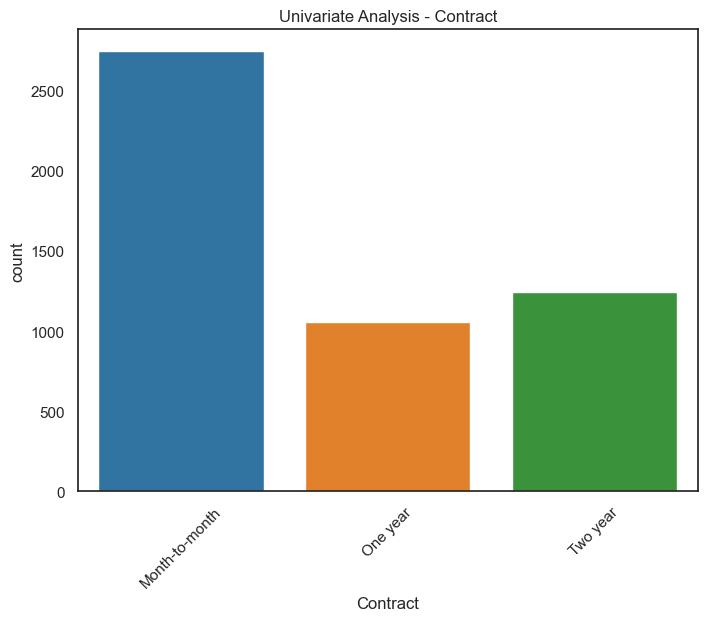

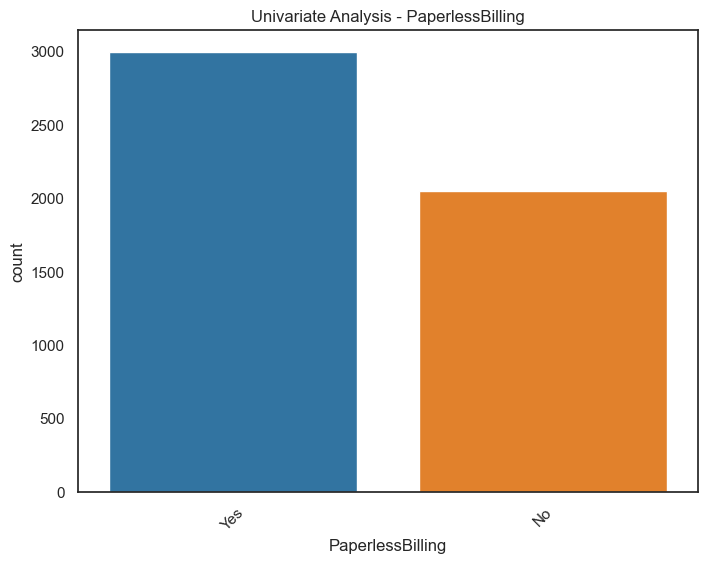

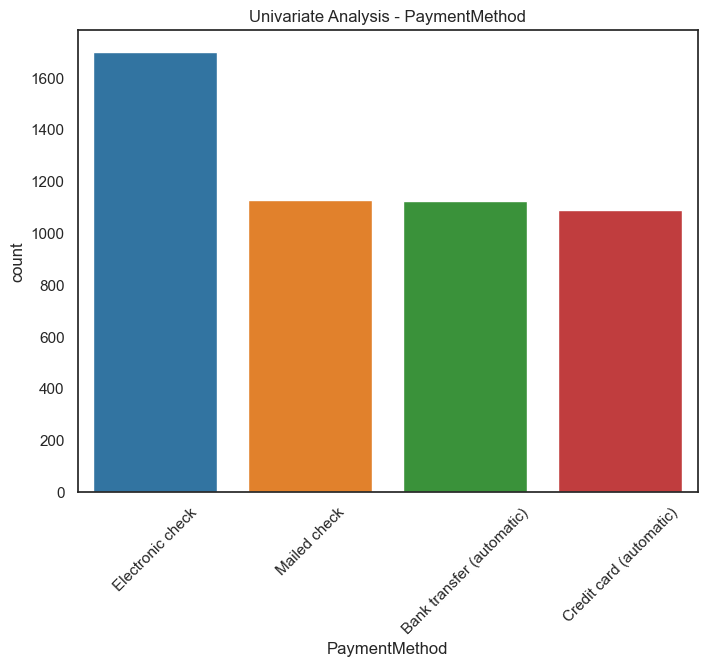

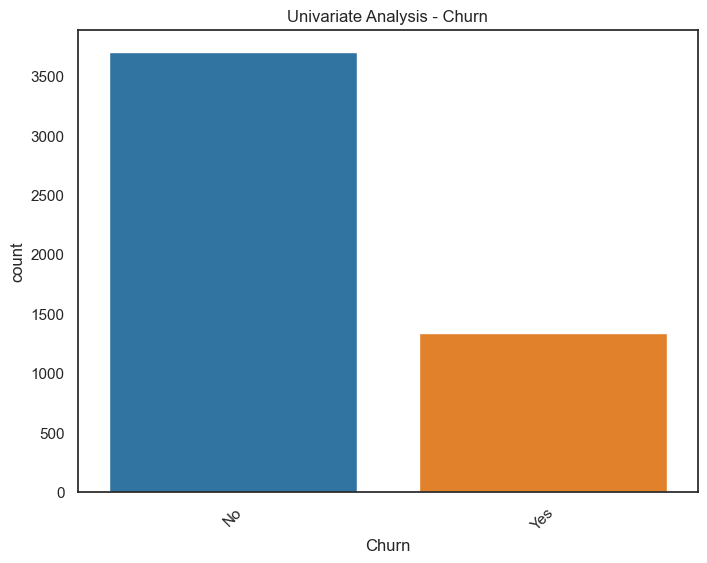

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette (you can adjust these colors as needed)
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Loop through each categorical column and create a count plot
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=merged, palette=custom_palette)
    plt.title(f'Univariate Analysis - {column}')
    plt.xticks(rotation=45)
    plt.show()


 The Univariate analysis showed a count of the various categorical columns. An example was Is the Fiber optic being the most served internet service with over 2000 in service. Some other key idenfiers was the gender distribution being a little tilted to the Male gender.

### Bivariate Analysis

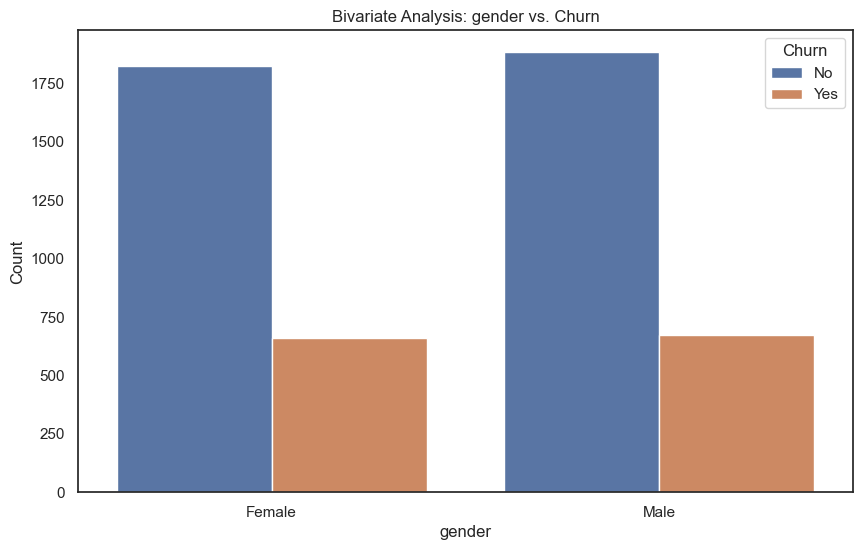

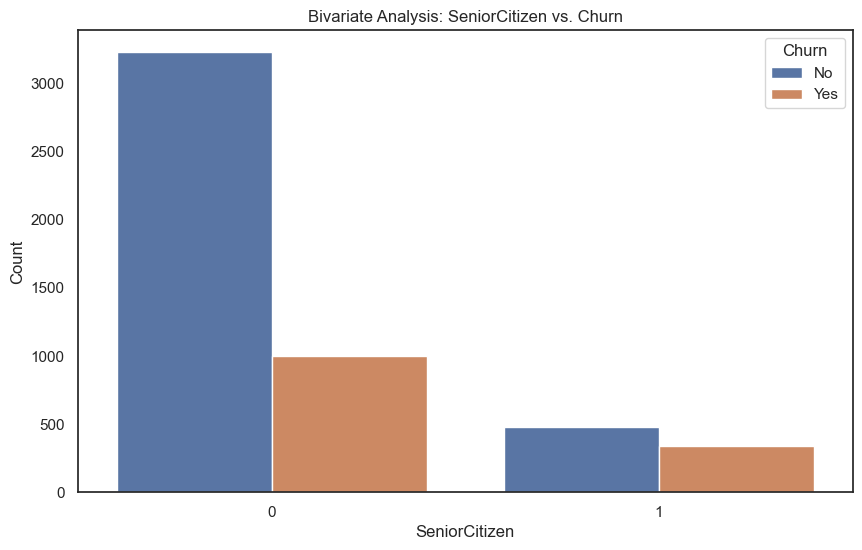

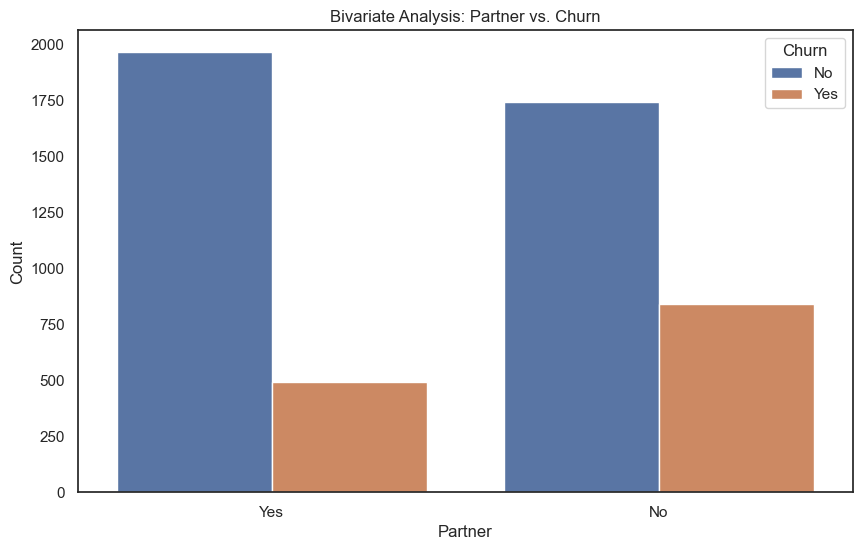

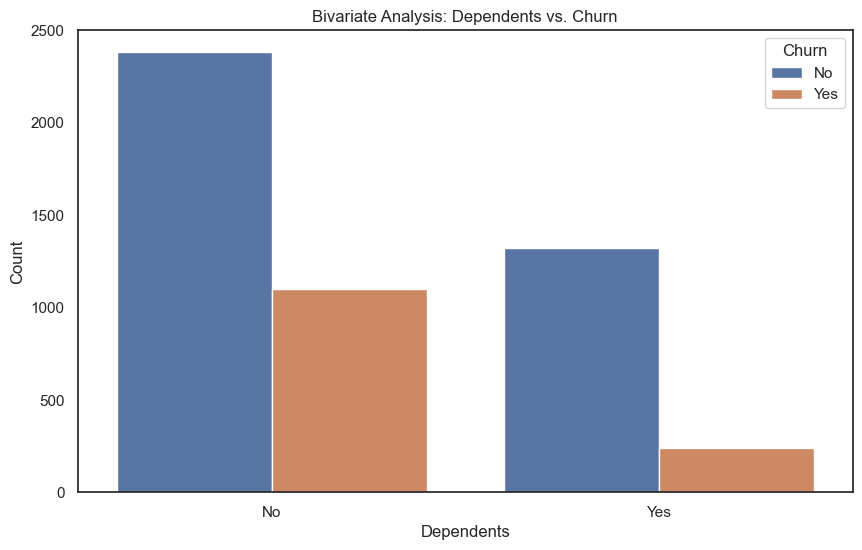

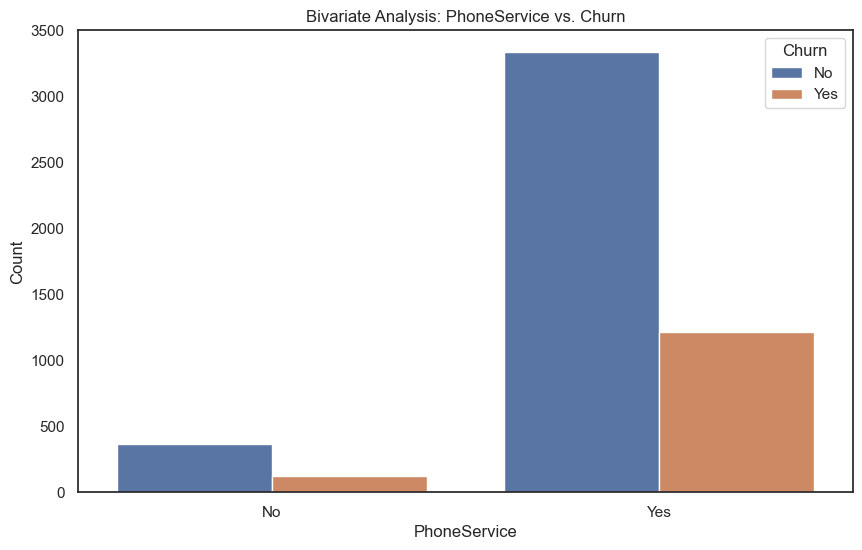

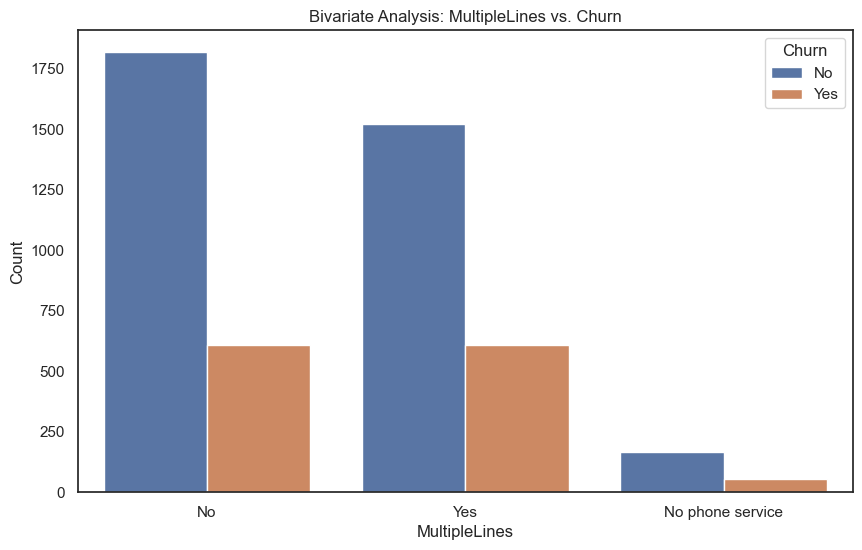

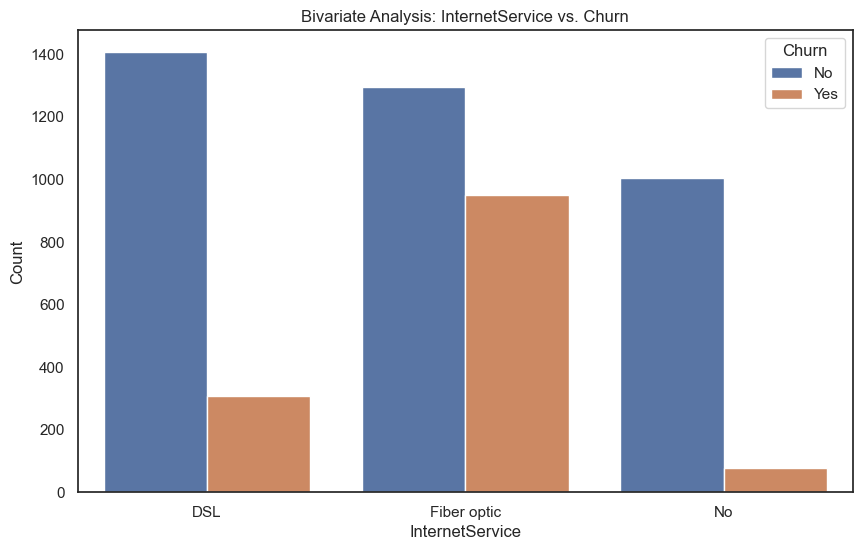

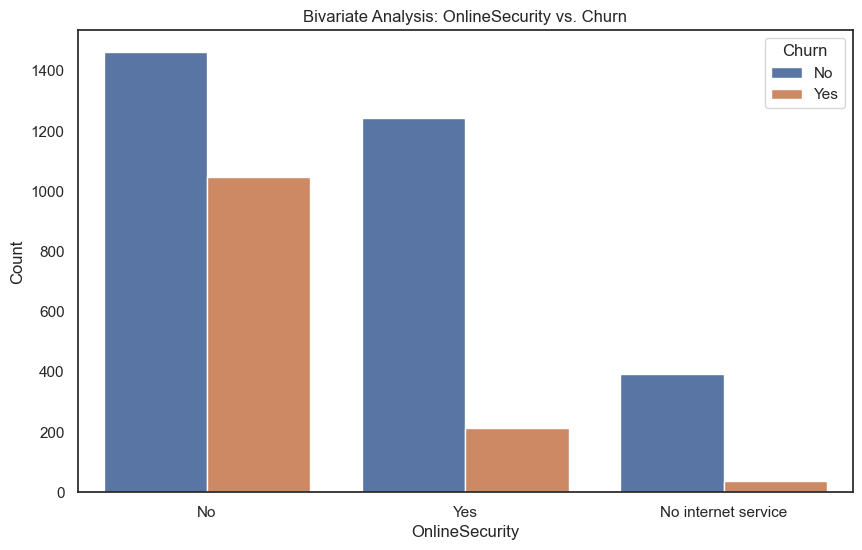

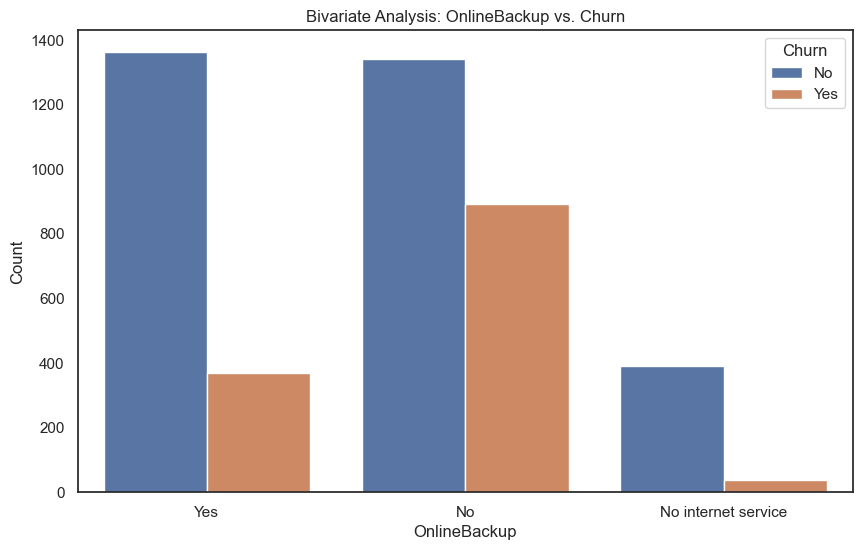

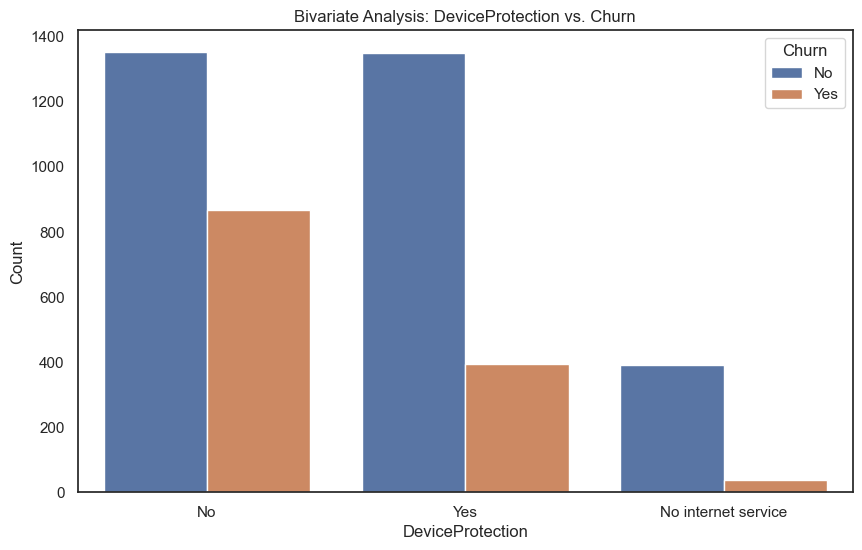

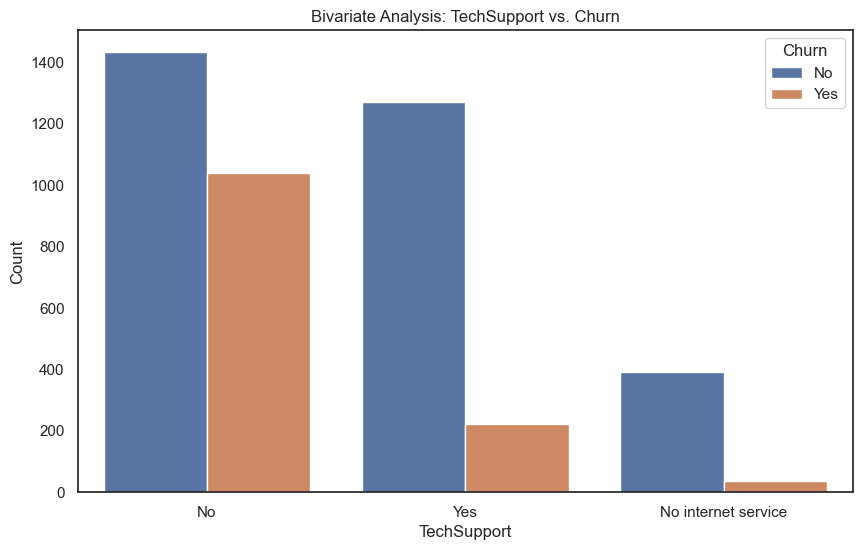

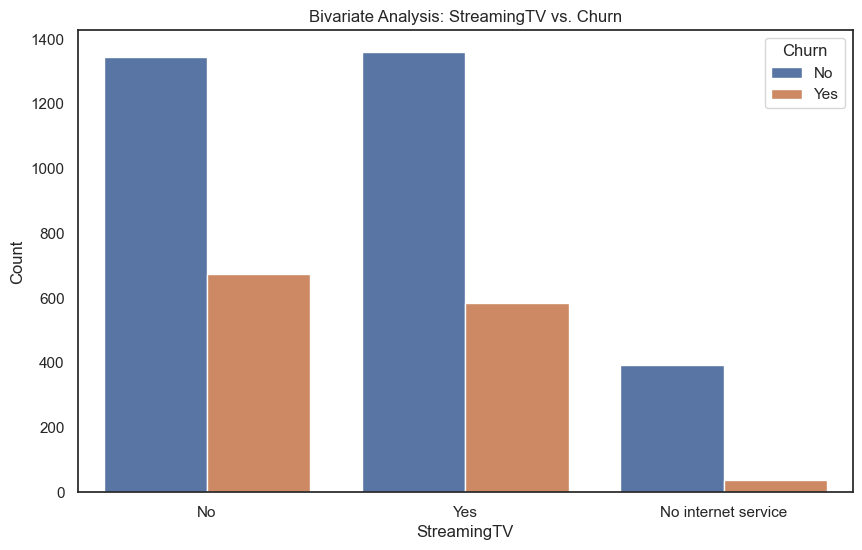

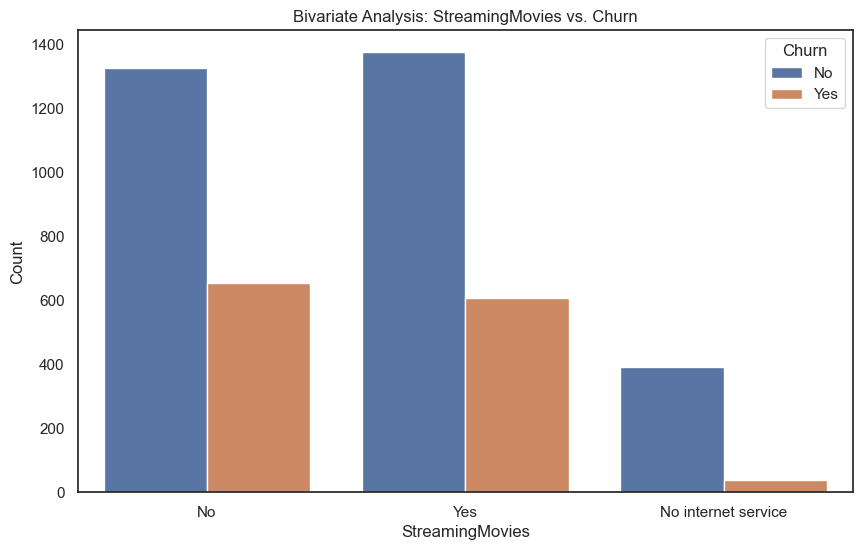

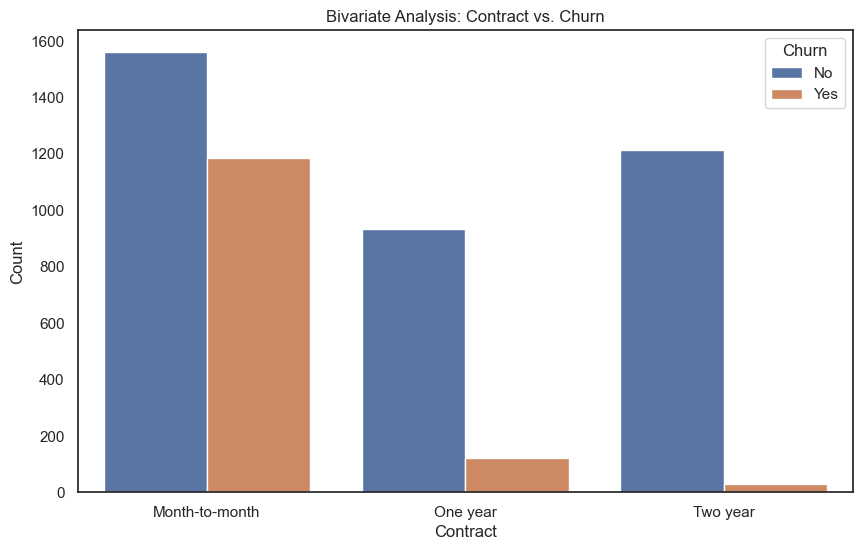

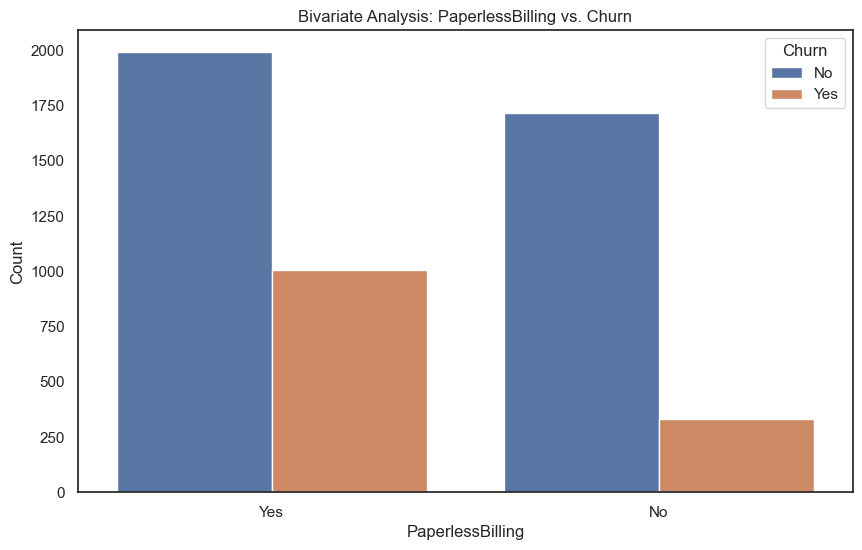

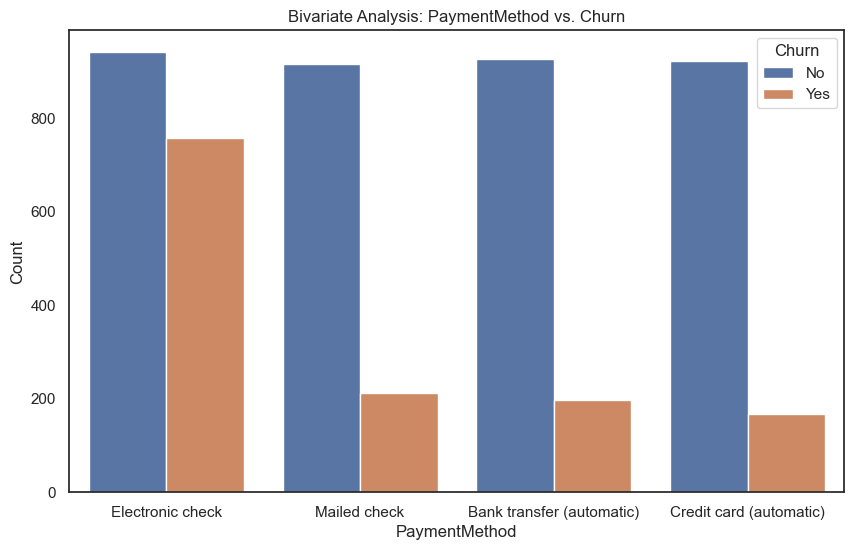

In [79]:
# Bivariate Analysis
for column in categorical_columns:
    if column != 'Churn':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Churn', data=merged)
        plt.title(f'Bivariate Analysis: {column} vs. Churn')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Churn', labels=['No', 'Yes'])
        plt.show()

We conducted a bivariate analysis against our churn target variable to understand the impact of various features.

The gender distribution shows an almost even spread in churn count. Among genders, males exhibited slightly higher retention in churn compared to females, although both genders averaged the same number of churned customers.

Senior citizens, according to the bivariate analysis, recorded the lowest churn rate as well as the lowest retention. In contrast, other demographics showed higher churn and retention numbers, suggesting their active participation in the Telco value chain but also their propensity to churn. The apparent stability in the senior citizen numbers may be attributed to their lower participation in the Telco space

### Multivariate analysis

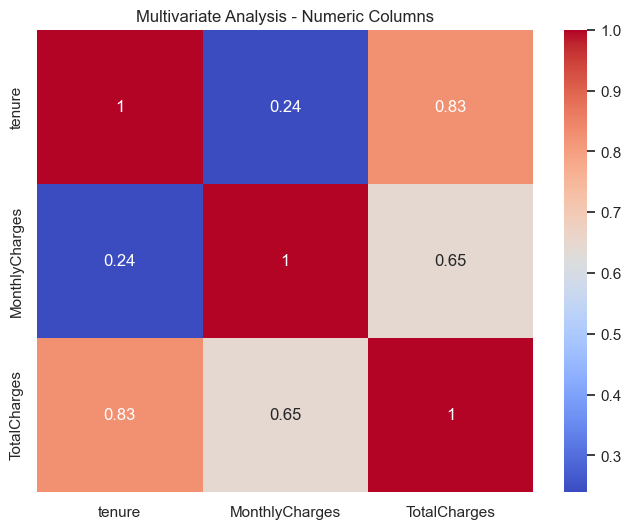

In [80]:
# Multivariate Analysis
# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8, 6))
sns.heatmap(merged[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Multivariate Analysis - Numeric Columns')
plt.show()


 The coefficients indicate a **positive linear relationship between tenure and MonthlyCharges**, as well as between **MonthlyCharges and TotalCharges**. This suggests that customers with longer tenure generally have higher monthly charges and total charges, whereas those with shorter tenure tend to have lower monthly and total charges.

In [81]:
# Target Variable distribution by percentage
100*merged['Churn'].value_counts()/len(merged['Churn'])

Churn
No     73.502578
Yes    26.497422
Name: count, dtype: float64

The data indicates that for Vodafone telecommunications, 26.49% of customers rate churned, while 73.49%  stayed. This suggests a relatively high churn rate, which could signal issues with customer satisfaction, service quality, or competition.

#### Hypothesis

- *Null Hypothesis (H0):* There is no significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.
- *Alternative Hypothesis (H1):* There is a significant relationship between the type of internet service (DSL, Fiber Optic, No) and customer churn.

In [82]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged['InternetService'], merged['Churn'])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant relationship between the type of internet service and customer churn.")

Chi-Square Statistic: 562.2698920653917
p-value: 8.028682205375917e-123
Degrees of Freedom: 2
Expected Frequencies:
 [[1260.56921856  454.43078144]
 [1651.60293534  595.39706466]
 [ 793.82784609  286.17215391]]
Reject the null hypothesis (H0). There is a significant relationship between the type of internet service and customer churn.


Given the p-value is far less than the standard significance levels of 0.05, we reject the null hypothesis. This means there is strong evidence to support the claim that there is a significant relationship between the type of internet service and customer churn.

### Analytical Questions

1. What are the demographic characteristics of customers who are more likely to churn?*
   - I explore the relationship between demographic variables (gender, senior citizen status, partnership status, dependents) and churn. For instance, are senior citizens more likely to churn than younger customers? Do customers with dependents churn at a different rate compared to those without?

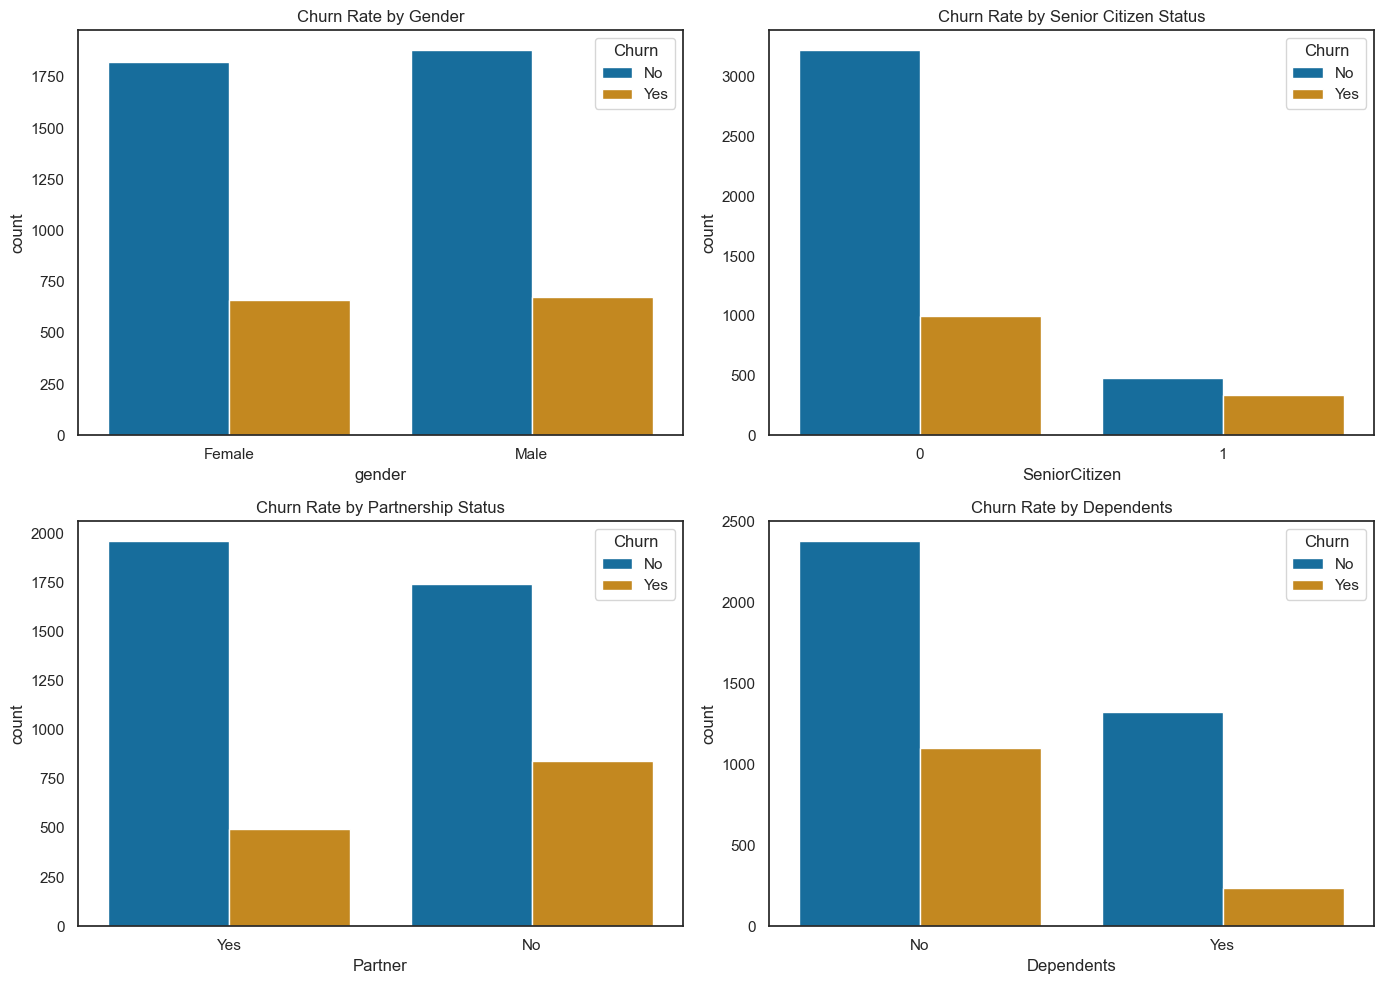

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set(style="white")
color_palette = sns.color_palette("colorblind")

# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Churn rate by gender
sns.countplot(x='gender', hue='Churn', data=merged, ax=axs[0, 0], palette=color_palette)
axs[0, 0].set_title('Churn Rate by Gender')
axs[0, 0].grid(False)

# Plot 2: Churn rate by senior citizen status
sns.countplot(x='SeniorCitizen', hue='Churn', data=merged, ax=axs[0, 1], palette=color_palette)
axs[0, 1].set_title('Churn Rate by Senior Citizen Status')
axs[0, 1].grid(False)

# Plot 3: Churn rate by partnership status
sns.countplot(x='Partner', hue='Churn', data=merged, ax=axs[1, 0], palette=color_palette)
axs[1, 0].set_title('Churn Rate by Partnership Status')
axs[1, 0].grid(False)

# Plot 4: Churn rate by dependents
sns.countplot(x='Dependents', hue='Churn', data=merged, ax=axs[1, 1], palette=color_palette)
axs[1, 1].set_title('Churn Rate by Dependents')
axs[1, 1].grid(False)

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


 Question 2 

   Does the type of internet service influence customer churn

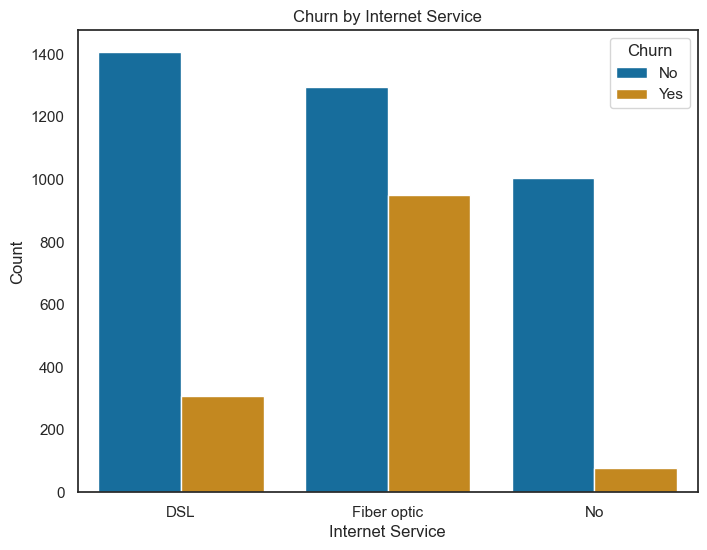

In [84]:
color_palette = sns.color_palette("colorblind")
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=merged, palette=color_palette)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that customers with DSL internet service have the highest number of non-churned customers, with a count of 1400. On the other hand, the count of churned customers for DSL internet service is 300. 

This suggests that customers with DSL internet service are less likely to churn compared to other internet service types. Optics, on the other hand, has a lower count of non-churned customers and a higher count of churned customers. 

In summary, the type of internet service does seem to influence customer churn, with DSL internet service showing a lower churn rate compared to other types.

Question 3

Are customers with a longer tenure less likely to churn 

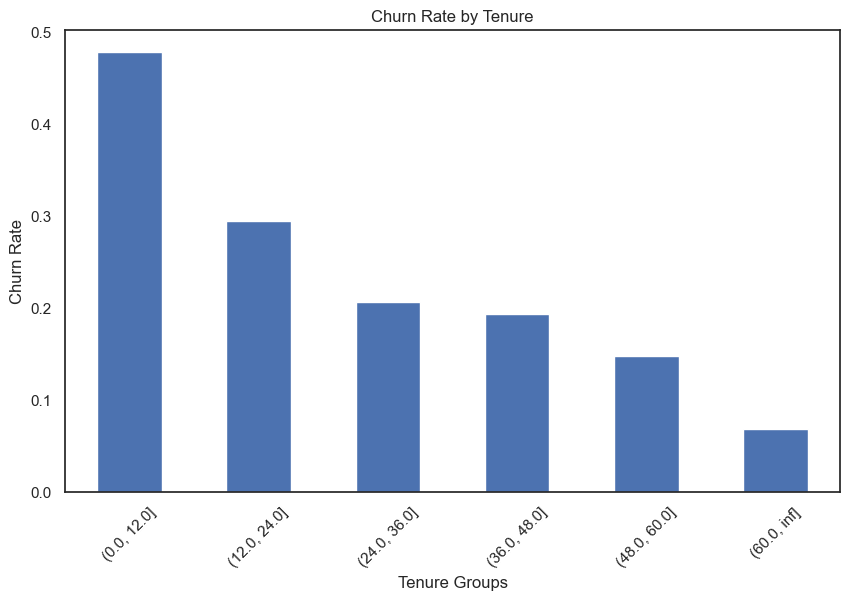

In [85]:
# Calculate churn rate for different tenure groups
tenure_groups = merged.groupby(pd.cut(merged['tenure'], bins=[0, 12, 24, 36, 48, 60, float('inf')]))
churn_rate = tenure_groups['Churn'].value_counts(normalize=True).unstack()['Yes']

# Plot the churn rate
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure Groups')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

Customers with a tenure of 0-12 months have the highest churn rate of 0.4. This indicates that customers who are relatively new to the service are more likely to churn. It could be because they are still in the early stages of evaluating the service or may have encountered issues that led to dissatisfaction.

Customers with a tenure of 24-36 months have a lower churn rate of 0.2. This suggests that customers who have been with the service for a moderate amount of time are less likely to churn compared to those with shorter tenures. 

Customers with a tenure of 60 months and above have the lowest churn rate of 0.05. This indicates that customers who have been with the service for a longer duration are significantly less likely to churn. These customers have likely developed a strong relationship with the service provider, are satisfied with the service, and may have a higher level of loyalty. 

In summary, the results suggest that there is a correlation between tenure and churn rate. Customers with longer tenures are indeed less likely to churn compared to those with shorter tenures. 

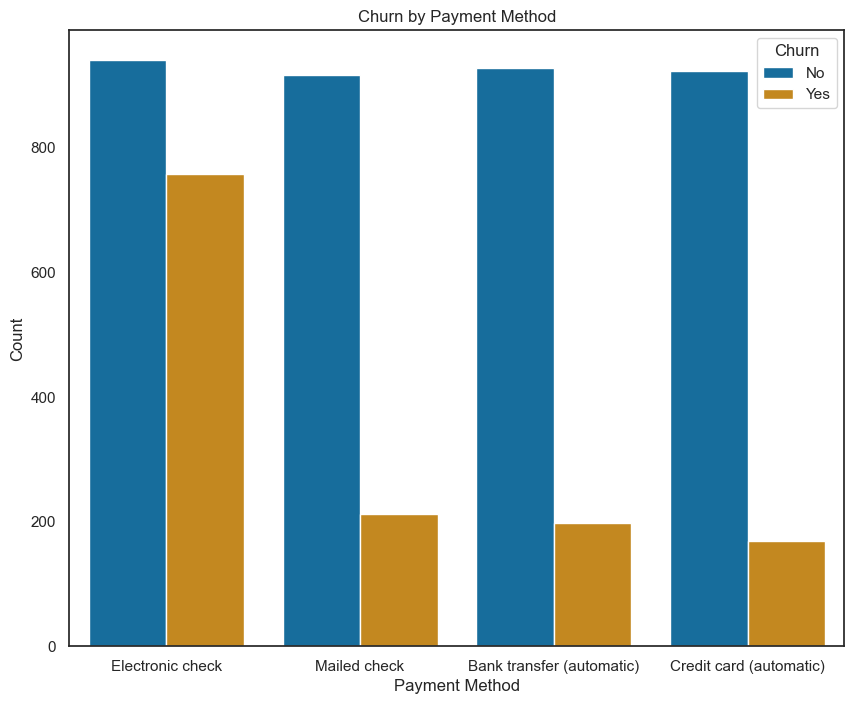

In [86]:
color_palette = sns.color_palette("colorblind")
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='Churn', data=merged, palette=color_palette)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that the payment method of "Electronic check" has the highest count of both non-churned and churned customers, with approximately 900 non-churned and 750 churned customers. On the other hand, the payment methods "Mail check," "Bank transfer (automatic)," and "Credit card (automatic)" have a relatively similar number of customers at around 900, but their churn count is significantly lower at approximately 200.

This suggests that the payment method of "Electronic check" has a higher churn rate compared to other payment methods. Customers who use electronic checks as their payment method are more likely to churn compared to customers who use other payment methods such as mail check, bank transfer (automatic), or credit card (automatic).

In summary, the payment method does seem to influence customer churn, with electronic check users having a higher churn rate compared to other payment methods.

### Data Preparation

In [87]:
# Use pandas.DataFrame.drop_duplicates method
merged.duplicated().sum()

np.int64(0)

### - Drop CustomerID because its irrelevant to the modeling process.

In [88]:
# Drop CustomerID because of it limitations
merged.drop(columns=['customerID'], inplace=True)


In [89]:
X = merged.drop('Churn',axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994


In [90]:
y = merged['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [91]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [92]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Split Data into Categorical and Numerical columns

In [93]:
numerical_columns = X.select_dtypes('number').columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [94]:
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [108]:
#machine learning package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [98]:
# Assuming X and y are your feature matrix and target vector respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


### Encode

In [103]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [109]:
# Check skewness to decide which scaler to use 
X.select_dtypes('number').skew()

SeniorCitizen     1.830907
tenure            0.225416
MonthlyCharges   -0.238663
TotalCharges      0.944216
dtype: float64

ReobustScaler because of the biases in the X_train data.

In [110]:
# Check if the are zero values or not to decide the type of transformation
X.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5042.0,0.162436,0.368886,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5042.0,32.568822,24.525954,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5042.0,65.081376,30.064564,18.400000,35.762500,70.550003,90.050002,118.650002
TotalCharges,5034.0,2300.954758,2268.346402,18.799999,417.662498,1401.000000,3860.599976,8670.100000


### Pipeline

In [ ]:
# create pipeline to take care of numerical data
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',))
    ('scaler', RobustScaler()),
    (),
])

# create pipeline to take care of categorical data
categoric_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent',))
    ()
])  

#combine the two pipelines together
preprocessor = ColumnTransformer(transformers=[
    (),
    ()
])

### `Key insights`
1. There are 3000 rows and 21 columns in the first dataset.
2. There are 2000 rows and 21 columns in the second dataset.
3. There are 5000 rows and 21 columns in the merged dataset.
4. Drop irrelevant Unamed:0 column from the merged dataset
5. TotalCharges has wrong Dtype instead of float.
6. The following columns have missing values:
     - MultipleLines        269
     - OnlineSecurity       651
     - OnlineBackup         651
     - DeviceProtection     651
     - TechSupport          651
     - StreamingTV          651
     - StreamingMovies      651
     - TotalCharges          8
     - Churn                 1
